In [1]:
pip install pandas numpy matplotlib scikit-learn xgboost tensorflow statsmodels fbprophet

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     -------------------- ------------------- 2.9/5.8 MB 42.3 MB/s eta 0:00:01
     ----------------------------- ---------- 4.2/5.8 MB 11.0 MB/s eta 0:00:01
     -------------------------------- ------- 4.7/5.8 MB 7.1 MB/s eta 0:00:01
     ---------------------------------------- 5.8/5.8 MB 7.8 M

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Ashutosh\AppData\Local\Temp

C:\Users\Ashutosh\AppData\Local\Temp\ipykernel_22564\1799182669.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


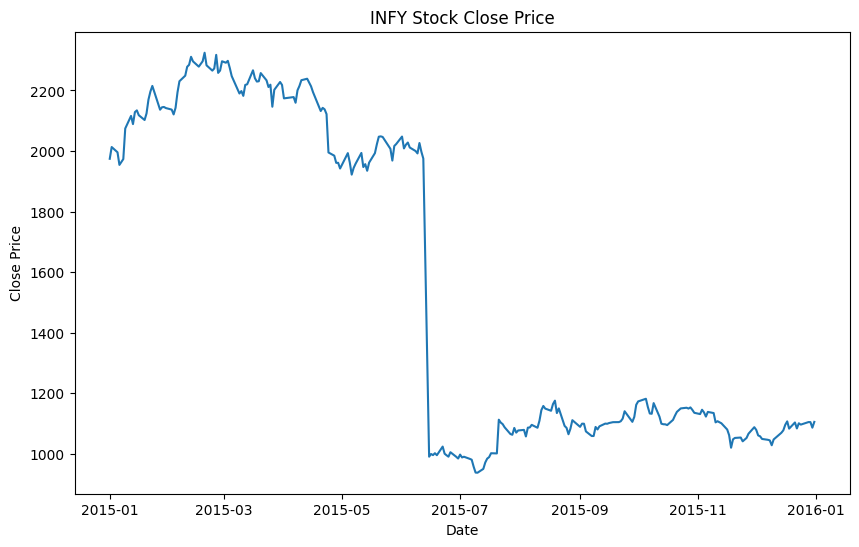

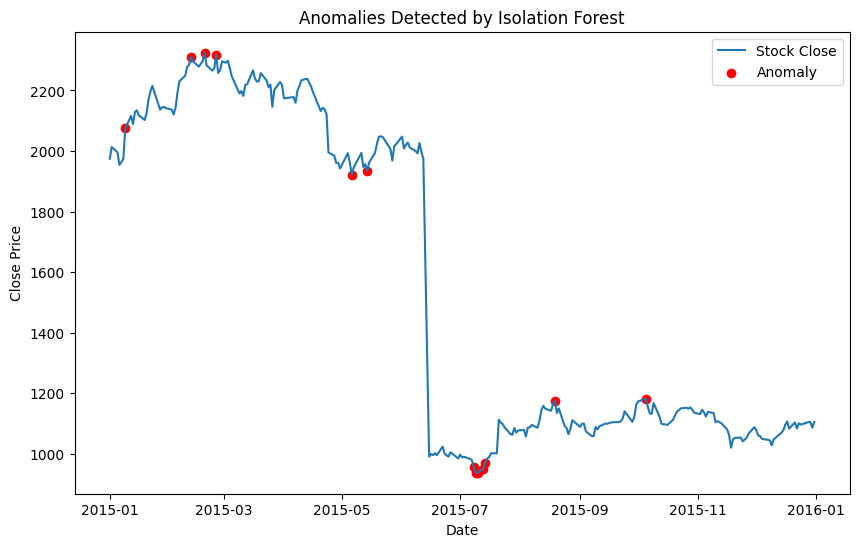

c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarnin

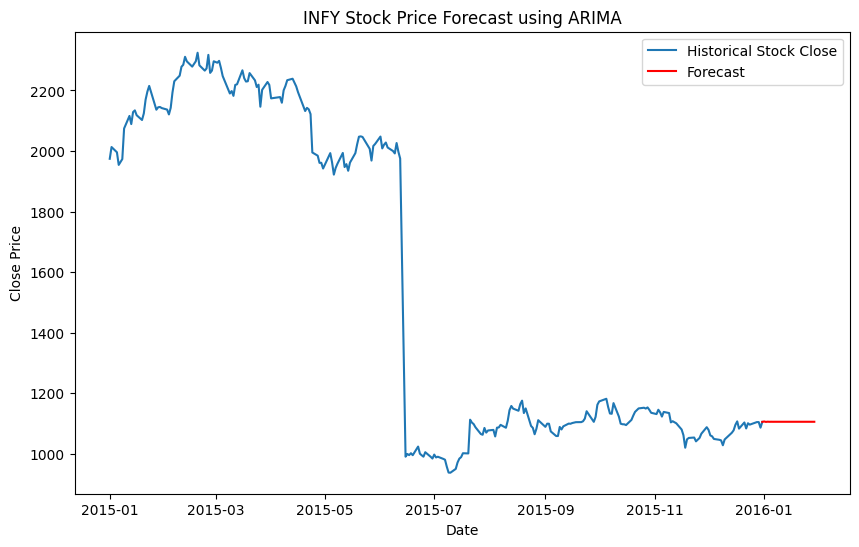

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.holtwinters import ExponentialSmoothing
#import xgboost as xgb
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense
#from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

# Load data
df = pd.read_csv('infy_stock.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Focus on 'Close' column for forecasting and anomaly detection
stock_data = df['Close']

# Plot the stock price data
plt.figure(figsize=(10, 6))
plt.plot(stock_data)
plt.title('INFY Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# ---- Anomaly Detection ----

# 1. Isolation Forest for anomaly detection
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data.values.reshape(-1, 1))

iso_forest = IsolationForest(contamination=0.05)
anomalies_if = iso_forest.fit_predict(scaled_data)

# Convert anomalies to 1 for anomaly and 0 for normal
anomalies_if = [1 if x == -1 else 0 for x in anomalies_if]

# Add anomalies to DataFrame
df['Anomaly_IF'] = anomalies_if

# Plot anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
plt.plot(df.index, stock_data, label='Stock Close')
plt.scatter(df.index[df['Anomaly_IF'] == 1], stock_data[df['Anomaly_IF'] == 1], color='red', label='Anomaly')
plt.title('Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# ---- Forecasting ----

# 1. ARIMA Forecasting
p, d, q = 5, 1, 0
arima_model = ARIMA(stock_data, order=(p, d, q))
arima_fit = arima_model.fit()

# Forecasting for the next 30 days
forecast_arima = arima_fit.forecast(steps=30)

# Plot ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='Historical Stock Close')
plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast_arima, color='red', label='Forecast')
plt.title('INFY Stock Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 2. SARIMA Forecasting (Seasonal ARIMA)
#P, D, Q, s = 1, 1, 1, 5  # Modify the seasonal parameters
#sarima_model = SARIMAX(stock_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
#sarima_fit = sarima_model.fit()

# Forecasting for the next 30 days using SARIMA
#forecast_sarima = sarima_fit.forecast(steps=30)

# Plot SARIMA forecast
#plt.figure(figsize=(10, 6))
#plt.plot(stock_data, label='Historical Stock Close')
#plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast_sarima, color='green', label='Forecast')
#plt.title('INFY Stock Price Forecast using SARIMA')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.legend()
#plt.show()

# 3. Holt-Winters Forecasting (Exponential Smoothing)
#holt_winters_model = ExponentialSmoothing(stock_data, trend='add', seasonal='add', seasonal_periods=5)
#holt_winters_fit = holt_winters_model.fit()

# Forecasting for the next 30 days using Holt-Winters
#forecast_hw = holt_winters_fit.forecast(steps=30)

# Plot Holt-Winters forecast
#plt.figure(figsize=(10, 6))
#plt.plot(stock_data, label='Historical Stock Close')
#plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast_hw, color='blue', label='Forecast')
#plt.title('INFY Stock Price Forecast using Holt-Winters')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.legend()
#plt.show()

# 4. XGBoost Forecasting

# Prepare the data for XGBoost model
#X = df[['Open', 'High', 'Low', 'Volume']].shift(1).dropna()
#y = stock_data[1:]  # Forecasting the next day's Close price

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#xgb_model = xgb.XGBRegressor()
#xgb_model.fit(X_train, y_train)

# Predictions xgb_predictions = xgb_model.predict(X_test)

# Plot XGBoost predictions
#plt.figure(figsize=(10, 6))
#plt.plot(y_test.index, y_test, label='True Close Price')
#plt.plot(y_test.index, xgb_predictions, label='Predicted Close Price', color='red')
#plt.title('XGBoost Forecasting')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.legend()
#plt.show()

# Evaluate XGBoost model
#mae_xgb = mean_absolute_error(y_test, xgb_predictions)
#print(f'Mean Absolute Error for XGBoost: {mae_xgb}')

# 5. LSTM Forecasting

# Prepare the data for LSTM
#def create_lstm_dataset(data, window_size=60):
 #   X = []
  #  y = []
   # for i in range(window_size, len(data)):
    #    X.append(data[i-window_size:i])
     #   y.append(data[i])
    #return np.array(X), np.array(y)

#scaled_data = scaler.fit_transform(stock_data.values.reshape(-1, 1))
#X_lstm, y_lstm = create_lstm_dataset(scaled_data)

# Split the data into training and testing sets
#X_lstm_train, X_lstm_test = X_lstm[:-100], X_lstm[-100:]
#y_lstm_train, y_lstm_test = y_lstm[:-100], y_lstm[-100:]

# Build the LSTM model
#model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm_train.shape[1], 1)))
#model.add(LSTM(units=50, return_sequences=False))
#model.add(Dense(units=1))

#model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(X_lstm_train, y_lstm_train, epochs=10, batch_size=32)

# Predict the stock price using LSTM
#lstm_predictions = model.predict(X_lstm_test)

# Invert the scaling of the predicted values
#lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot LSTM predictions
#plt.figure(figsize=(10, 6))
#plt.plot(stock_data.index[-100:], y_lstm_test, label='True Close Price')
#plt.plot(stock_data.index[-100:], lstm_predictions, label='Predicted Close Price', color='red')
#plt.title('LSTM Forecasting')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.legend()
#plt.show()

# 6. Prophet Forecasting

# Prepare data for Prophet model
#prophet_data = df[['Close']].reset_index()
#prophet_data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Initialize and fit Prophet model
#prophet_model = Prophet()
#prophet_model.fit(prophet_data)

# Create future dataframe
#future = prophet_model.make_future_dataframe(prophet_data, periods=30)
#forecast = prophet_model.predict(future)

# Plot Prophet forecast
#prophet_model.plot(forecast)
#plt.title('Prophet Forecasting')
#plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.show()

